# Nama : Farhan Syah Putra Wiyono
# NPM : 23083010088
# Kelas : A
# Transformasi Data

### kolom 'Name' : Nama Entitas Perusahaan yang Membayar Pajak

### kolom 'Month' : Saat Hotel Membayar Pajak Perbulan

### kolom 'Quarter' : Saat Hoter Membayar Pajak Perkuarter

### kolom 'Year' : Saat Hotel Membayar Pajak Pertahun

### kolom 'Filing Frequency' : Seberapa Sering Hotel Melaporkan Wajib Pajak

### kolom 'Due Date' : Tenggat Waktu Hotel Untuk Membayar Pajak

### kolom 'Taxable Amount' : Besarnya Penghasilan atau Pendapatan untuk Membayar Pajak

### kolom 'Tax Due' : Jumlah Pajak yang Harus Dibayarkan

### kolom 'Interest' : Bunga 

### kolom 'Penalty' : Denda

### kolom 'Total Amount Due' :Jumlah Pajak yang Harus Dibayar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\SINCAN\AppData\Local\Temp\ipykernel_30800\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Ganti path ini dengan path file Excel Anda
file_path = r"D:\Tugas Coding Mengoding\Nyoh Coding sem 3\Analisis Data Eksploratif\hotel tax.xlsx"

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan 5 baris pertama data
df.head()


,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
0,Rocket Travel Inc.,8.0,NaN,2020,M,09/30/2020,748.47,52.39,0.0,0.0,52.39
1,Bethesda Hotel Associates LLC,4.0,NaN,2019,M,05/31/2019,1030148.47,72110.39,0.0,0.0,72110.39
2,Canopy by Hilton-Washington DC-North Bethesda,6.0,NaN,2019,M,07/31/2019,805303.00,56371.21,0.0,0.0,56371.21
3,ELSS LLC,8.0,NaN,2019,M,09/30/2019,223343.71,15634.05,0.0,0.0,15634.05
4,TripAdvisor LLC,4.0,NaN,2019,M,05/31/2019,3492.23,244.45,0.0,0.0,244.45


In [3]:
# Menampilkan data awal dan informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1905 non-null   object 
 1   Month             1778 non-null   float64
 2   Quarter           127 non-null    float64
 3   Year              1905 non-null   int64  
 4   Filing Frequency  1905 non-null   object 
 5   Due Date          1905 non-null   object 
 6   Taxable Amount    1905 non-null   float64
 7   Tax Due           1905 non-null   float64
 8   Interest          1905 non-null   float64
 9   Penalty           1905 non-null   float64
 10  Total Amount Due  1905 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 163.8+ KB


In [4]:
#menampilkan kolom dataset
df.columns

Index(['Name', 'Month', 'Quarter', 'Year', 'Filing Frequency', 'Due Date',
       'Taxable Amount', 'Tax Due', 'Interest', 'Penalty', 'Total Amount Due'],
      dtype='object')

# Terdapat Missing Value

In [5]:
# Memeriksa missing value dalam dataset
print("\nMemeriksa missing value:\n")
missing_values = df.isnull().sum()
print(missing_values)

# Mengecek total missing values di seluruh dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")




Memeriksa missing value:

Name                   0
Month                127
Quarter             1778
Year                   0
Filing Frequency       0
Due Date               0
Taxable Amount         0
Tax Due                0
Interest               0
Penalty                0
Total Amount Due       0
dtype: int64

Total missing values: 1905


# Mengatasi Missing Value

In [6]:
# Mengisi nilai hilang di kolom 'Month' dengan median
median_month = df['Month'].median()
df['Month'].fillna(median_month, inplace=True)

# Mengisi nilai hilang di kolom 'Quarter' berdasarkan 'Month'
# Kuartal dihitung sebagai: 1 untuk bulan 1-3, 2 untuk bulan 4-6, 3 untuk bulan 7-9, 4 untuk bulan 10-12
df['Quarter'] = df['Month'].apply(lambda x: (x-1)//3 + 1)

# Memeriksa kembali apakah ada nilai hilang setelah imputasi
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation


C:\Users\SINCAN\AppData\Local\Temp\ipykernel_30800\3437724225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(median_month, inplace=True)


Name                0
Month               0
Quarter             0
Year                0
Filing Frequency    0
Due Date            0
Taxable Amount      0
Tax Due             0
Interest            0
Penalty             0
Total Amount Due    0
dtype: int64

# Mengecek Distribusi Data

In [7]:
# Mengecek distribusi data untuk Taxable Amount, Tax Due, dan Total Amount Due
print("\nDistribusi Taxable Amount:\n")
print(df['Taxable Amount'].describe())

print("\nDistribusi Tax Due:\n")
print(df['Tax Due'].describe())

print("\nDistribusi Total Amount Due:\n")
print(df['Total Amount Due'].describe())



Distribusi Taxable Amount:

count    1.905000e+03
mean     2.265323e+05
std      3.262643e+05
min      0.000000e+00
25%      2.504669e+04
50%      1.089234e+05
75%      2.757405e+05
max      2.646011e+06
Name: Taxable Amount, dtype: float64

Distribusi Tax Due:

count      1905.000000
mean      15857.256189
std       22838.502964
min           0.000000
25%        1753.260000
50%        7624.630000
75%       19301.830000
max      185220.770000
Name: Tax Due, dtype: float64

Distribusi Total Amount Due:

count      1905.000000
mean      15871.815543
std       22840.369793
min           0.000000
25%        1753.260000
50%        7631.220000
75%       19338.180000
max      185220.770000
Name: Total Amount Due, dtype: float64


# Mengecek Apakah Ada Data yang Sama

In [8]:
# Memeriksa apakah ada nilai duplikat dalam dataset
duplicate_values = df.duplicated()

# Menghitung jumlah duplikat
num_duplicates = duplicate_values.sum()

# Menampilkan jumlah duplikat
num_duplicates

1

In [9]:
df[df. duplicated()]

,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due
608,Pauline Rubinstein,4.0,2.0,2019,M,05/31/2019,0.0,0.0,0.0,0.0,0.0


# Menghapus Data yang Sama

In [10]:
#menampilkan indeks baris yang terdapat duplikat
index_duplicated = df[df. duplicated()].index
index_duplicated

Index([608], dtype='int64')

In [11]:
#menghapud baris yang duplikat
df.drop(index=index_duplicated, inplace = True)


In [12]:
# Memeriksa apakah ada nilai duplikat dalam dataset
duplicate_values = df.duplicated()

# Menghitung jumlah duplikat
num_duplicates = duplicate_values.sum()

# Menampilkan jumlah duplikat
num_duplicates

0

In [13]:
# Simpan hasil pembersihan dataset dalam variabel df_cleaned
df_cleaned = df.copy()

# Mengkategorikan kolom Taxable Amount atau Jumlah penghasilan yang dikenakan pajak berdasarkan nilai kuartilnya

In [14]:
# Membaca file Excel
df_kuartil = pd.read_excel(file_path)

# Menghitung kuartil untuk kolom 'Taxable Amount'
kuartil1 = df_kuartil['Taxable Amount'].quantile(0.25)
kuartil2 = df_kuartil['Taxable Amount'].quantile(0.50)
kuartil3 = df_kuartil['Taxable Amount'].quantile(0.75)

# Fungsi untuk mengkategorikan nilai berdasarkan kuartil
def kategorisasi_kuartil(nilai):
    if nilai <= kuartil1:
        return 'D'
    elif nilai <= kuartil2:
        return 'C'
    elif nilai <= kuartil3:
        return 'B'
    else:
        return 'A'

# Menerapkan fungsi kategorisasi ke kolom 'Taxable Amount'
df_kuartil['Taxable Amount Category'] = df['Taxable Amount'].apply(kategorisasi_kuartil)

# Menampilkan dataset yang telah diperbarui
df_kuartil

,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due,Taxable Amount Category
0,Rocket Travel Inc.,8.0,NaN,2020,M,09/30/2020,748.47,52.39,0.0,0.0,52.39,D
1,Bethesda Hotel Associates LLC,4.0,NaN,2019,M,05/31/2019,1030148.47,72110.39,0.0,0.0,72110.39,A
2,Canopy by Hilton-Washington DC-North Bethesda,6.0,NaN,2019,M,07/31/2019,805303.00,56371.21,0.0,0.0,56371.21,A
3,ELSS LLC,8.0,NaN,2019,M,09/30/2019,223343.71,15634.05,0.0,0.0,15634.05,B
4,TripAdvisor LLC,4.0,NaN,2019,M,05/31/2019,3492.23,244.45,0.0,0.0,244.45,D
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Congressional Country Club,12.0,NaN,2020,M,01/31/2021,15635.00,1094.45,0.0,0.0,1094.45,D
1901,Interim Homes,NaN,1.0,2021,Q,04/30/2021,1955.00,136.85,0.0,0.0,136.85,D
1902,Basic Overnight Quarters LLC,NaN,4.0,2020,Q,01/31/2021,0.00,0.00,0.0,0.0,0.00,D
1903,"Gaithersburg Operator, LLC",1.0,NaN,2021,M,02/28/2021,384360.01,26905.20,0.0,0.0,26905.20,A


In [15]:
# Menghitung kuartil untuk kolom 'Taxable Amount'
kuartil1 = df['Taxable Amount'].quantile(0.25)
kuartil2 = df['Taxable Amount'].quantile(0.50)
kuartil3 = df['Taxable Amount'].quantile(0.75)

# Fungsi untuk mengkategorikan nilai berdasarkan kuartil
def kategorisasi_kuartil(nilai):
    if nilai <= kuartil1:
        return 'D'
    elif nilai <= kuartil2:
        return 'C'
    elif nilai <= kuartil3:
        return 'B'
    else:
        return 'A'

# Menerapkan fungsi kategorisasi ke kolom 'Taxable Amount'
df['Taxable Amount Category'] = df['Taxable Amount'].apply(kategorisasi_kuartil)

# Menampilkan hanya kolom 'Taxable Amount' dan 'Taxable Amount Category'
df_filtered = df[['Taxable Amount', 'Taxable Amount Category']]
df_filtered


,Taxable Amount,Taxable Amount Category
0,748.47,D
1,1030148.47,A
2,805303.00,A
3,223343.71,B
4,3492.23,D
...,...,...
1900,15635.00,D
1901,1955.00,D
1902,0.00,D
1903,384360.01,A


# Mendeteksi Outlier

In [16]:
# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers in relevant numerical columns
outliers = {}
numeric_columns = ['Month', 'Quarter', 'Year', 'Taxable Amount', 'Tax Due', 'Interest', 'Penalty', 'Total Amount Due']

for column in numeric_columns:
    outliers[column] = detect_outliers(df, column)

# Count of outliers detected in each column
outlier_counts = {column: len(outliers[column]) for column in numeric_columns}

outlier_counts


{'Month': 0,
 'Quarter': 0,
 'Year': 0,
 'Taxable Amount': 182,
 'Tax Due': 182,
 'Interest': 32,
 'Penalty': 32,
 'Total Amount Due': 181}

# Metode IQR (Interquartile Range)

In [17]:
# Mengidentifikasi kolom numerik
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
print("Kolom numerik:", numerical_columns)

# Fungsi untuk mencari outlier menggunakan metode IQR
def find_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mencari data yang di luar bound (outliers)
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'Outlier pada kolom {col}:')
        if not outliers[col].empty:
            print(outliers[col][[col]].head())
        else:
            print(f'Tidak ada outlier di kolom {col}')
    return outliers

# Mencari outlier dalam data
outliers = find_outliers_iqr(df_cleaned, numerical_columns)

# Mengecek jika ada outlier di seluruh kolom numerik
if any([len(outliers[col]) > 0 for col in numerical_columns]):
    print("Outlier ditemukan.")
else:
    print("Tidak ada outlier.")


Kolom numerik: Index(['Month', 'Quarter', 'Year', 'Taxable Amount', 'Tax Due', 'Interest',
       'Penalty', 'Total Amount Due'],
      dtype='object')
Outlier pada kolom Month:
Tidak ada outlier di kolom Month
Outlier pada kolom Quarter:
Tidak ada outlier di kolom Quarter
Outlier pada kolom Year:
Tidak ada outlier di kolom Year
Outlier pada kolom Taxable Amount:
    Taxable Amount
1       1030148.47
2        805303.00
5        863935.31
6        692560.57
12      1488662.71
Outlier pada kolom Tax Due:
      Tax Due
1    72110.39
2    56371.21
5    60475.47
6    48479.23
12  104206.38
Outlier pada kolom Interest:
     Interest
73       2.76
116    114.09
125    132.32
194      0.35
241      2.30
Outlier pada kolom Penalty:
     Penalty
73     13.82
116   570.46
125   661.62
194     1.75
241    11.53
Outlier pada kolom Total Amount Due:
    Total Amount Due
1           72110.39
2           56371.21
5           60475.47
6           48479.23
12         104206.38
Outlier ditemukan.


# Menampilkan Boxplot yang Memiliki Outlier

c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version 

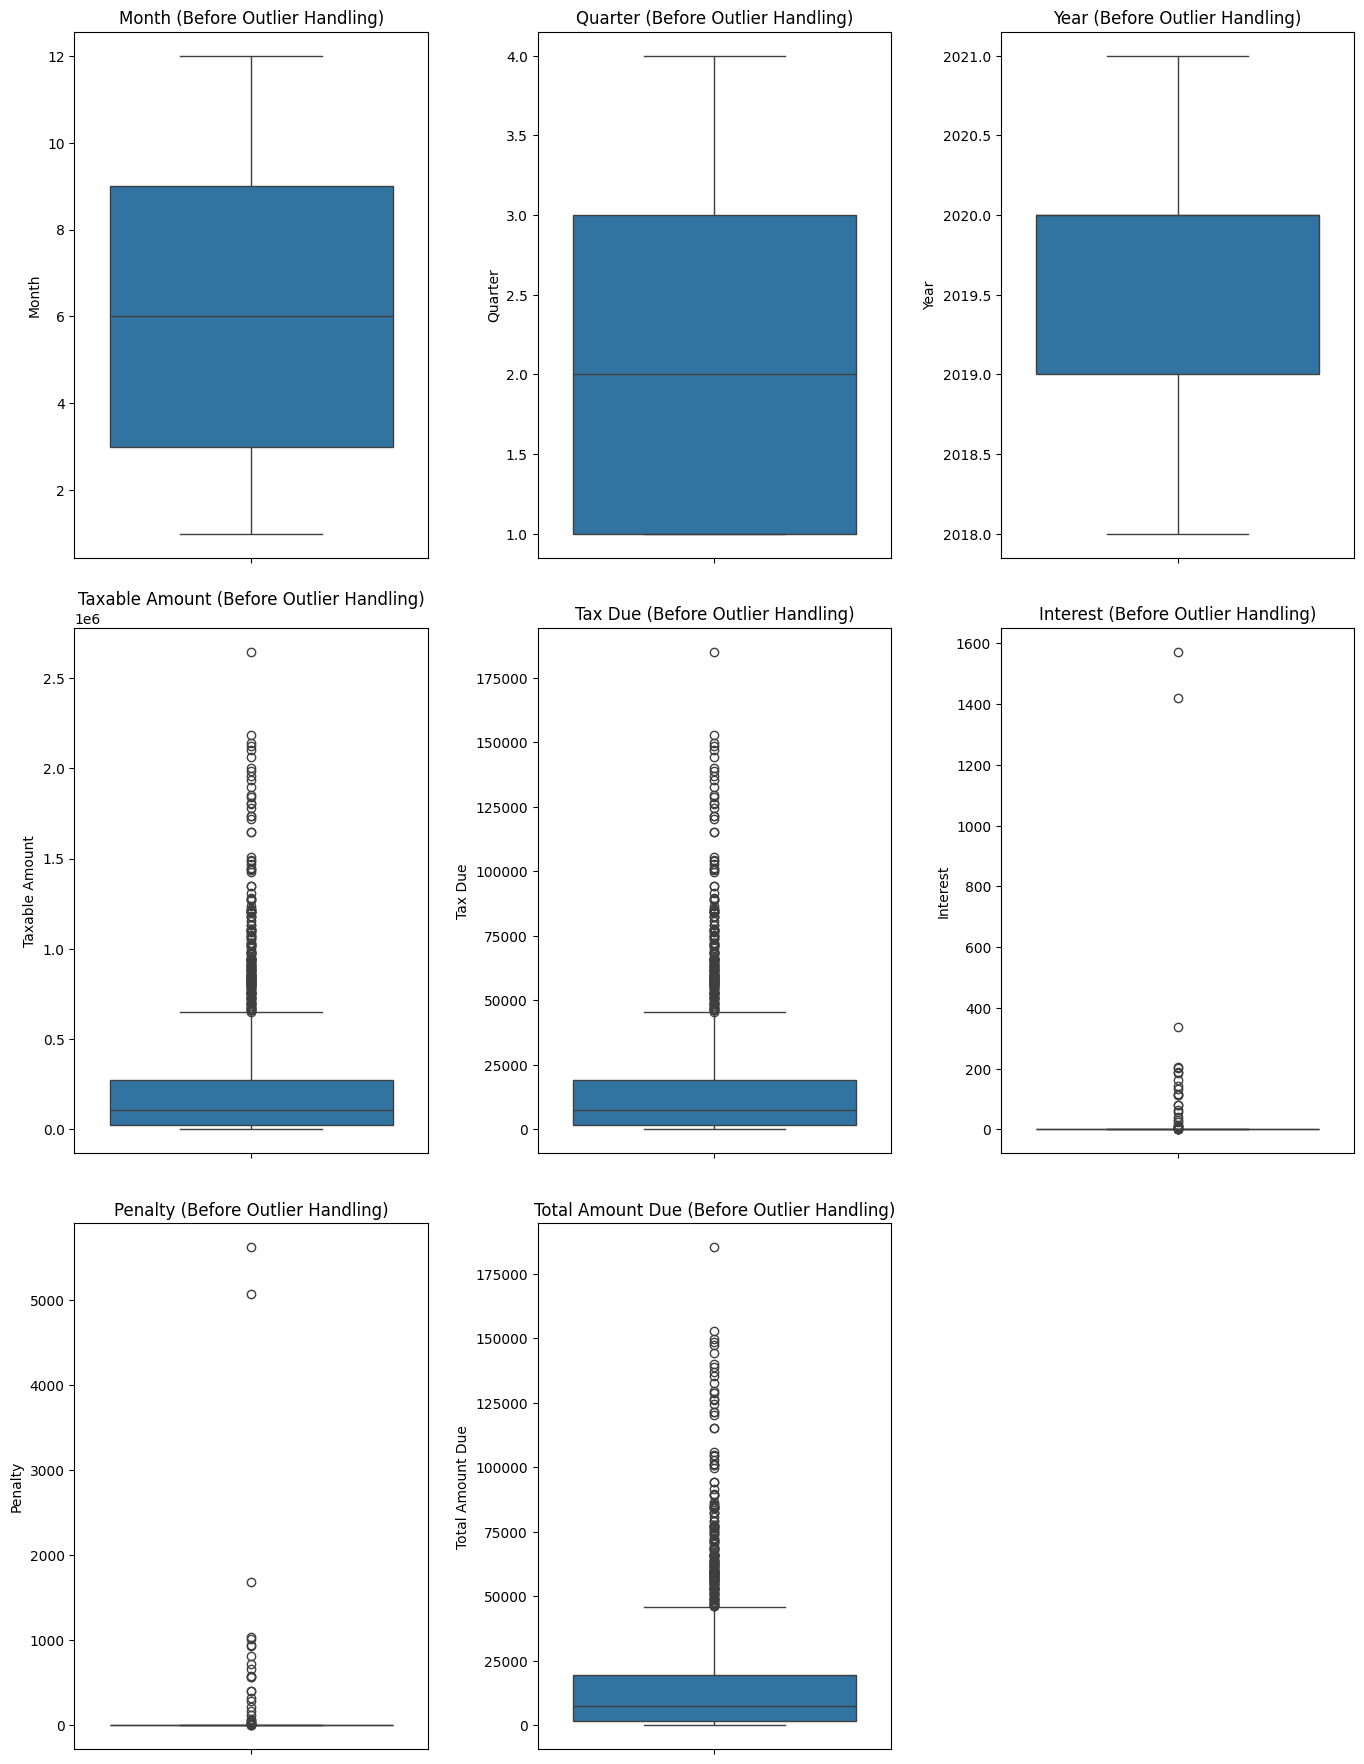

In [18]:

outlier_columns = ['Month', 'Quarter', 'Year',  'Taxable Amount', 'Tax Due', 'Interest', 'Penalty', 'Total Amount Due']


# Menentukan jumlah kolom dan baris untuk boxplot
num_cols = 3
num_rows = (len(outlier_columns) + num_cols - 1) // num_cols  # Menghitung jumlah baris

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(14, 6 * num_rows))

# Membuat boxplot untuk setiap kolom yang memiliki outlier
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_cleaned[col])
    plt.title(f'{col} (Before Outlier Handling)', fontsize=12)
    plt.xlabel('')  # Menghapus label X karena tidak dibutuhkan
    plt.ylabel(col, fontsize=10)  # Label Y untuk nama kolom

# Menyusun layout dan memberikan padding
plt.tight_layout(pad=2.0)
plt.show()


# Menggunakan Metode IQR dengan cara Mengganti Outlier dengan Nilai Median

In [19]:
# Kolom-kolom yang akan diimputasi
columns_to_impute = ['Taxable Amount', 'Tax Due', 'Interest', 'Penalty', 'Total Amount Due']

# Fungsi untuk mengimputasi outlier dengan clipping
def impute_outliers_clipping(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Mengganti nilai outlier dengan batas bawah dan atas
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    
    return df

# Mengimputasi outlier dengan clipping untuk setiap kolom dalam daftar
df_clipped = df.copy()
for column in columns_to_impute:
    df_clipped = impute_outliers_clipping(df_clipped, column)

# Menampilkan data yang sudah diimputasi dengan clipping
df_clipped


,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due,Taxable Amount Category
0,Rocket Travel Inc.,8.0,3.0,2020,M,09/30/2020,748.4700,52.390,0.0,0.0,52.390,D
1,Bethesda Hotel Associates LLC,4.0,2.0,2019,M,05/31/2019,902351.6995,63164.612,0.0,0.0,63164.612,A
2,Canopy by Hilton-Washington DC-North Bethesda,6.0,2.0,2019,M,07/31/2019,805303.0000,56371.210,0.0,0.0,56371.210,A
3,ELSS LLC,8.0,3.0,2019,M,09/30/2019,223343.7100,15634.050,0.0,0.0,15634.050,B
4,TripAdvisor LLC,4.0,2.0,2019,M,05/31/2019,3492.2300,244.450,0.0,0.0,244.450,D
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Congressional Country Club,12.0,4.0,2020,M,01/31/2021,15635.0000,1094.450,0.0,0.0,1094.450,D
1901,Interim Homes,6.0,2.0,2021,Q,04/30/2021,1955.0000,136.850,0.0,0.0,136.850,D
1902,Basic Overnight Quarters LLC,6.0,2.0,2020,Q,01/31/2021,0.0000,0.000,0.0,0.0,0.000,D
1903,"Gaithersburg Operator, LLC",1.0,1.0,2021,M,02/28/2021,384360.0100,26905.200,0.0,0.0,26905.200,A


# Menampilkan Boxplot Setelah Outlier Diclip

c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\SINCAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version 

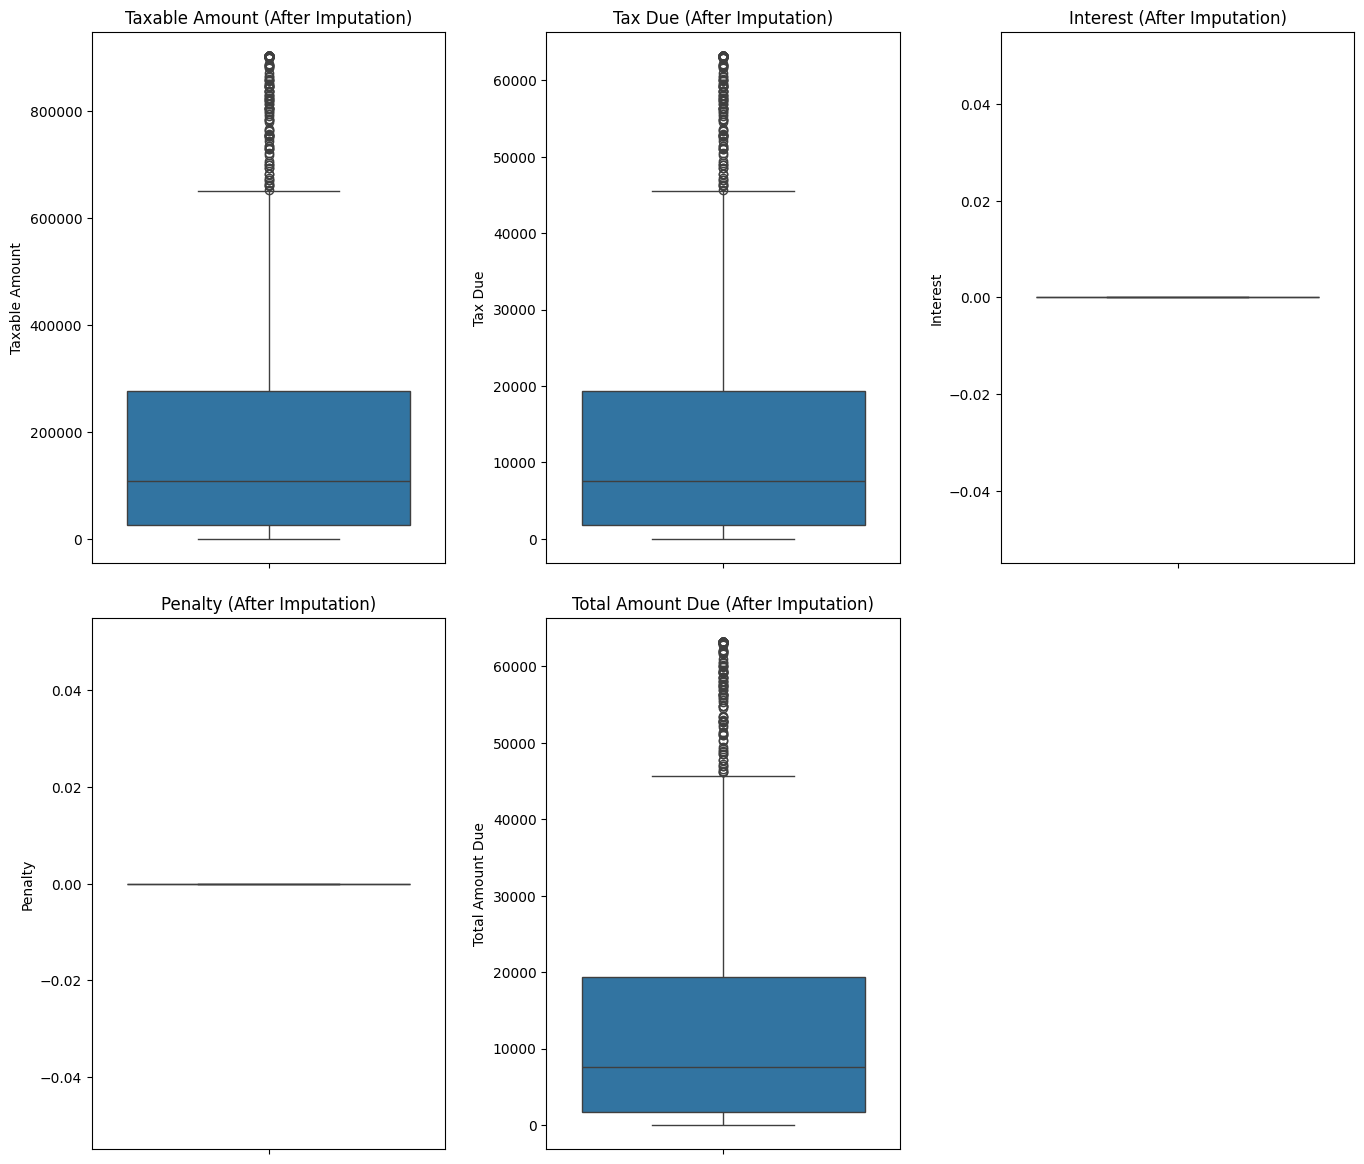

In [20]:
# Menentukan jumlah kolom dan baris untuk boxplot
num_cols = 3
num_rows = (len(columns_to_impute) + num_cols - 1) // num_cols  # Menghitung jumlah baris

plt.figure(figsize=(14, 6 * num_rows))  # Memperbesar ukuran figure agar plot lebih lebar dan tinggi

# Membuat box plot untuk kolom yang telah diimputasi
for i, col in enumerate(columns_to_impute, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_clipped[col])
    plt.title(f'{col} (After Imputation)', fontsize=12)  # Judul plot

# Menyusun layout dan menambah padding antar subplot
plt.tight_layout(pad=2.0)
plt.show()


# Log Transformasi

In [21]:
# Menyalin dataframe asli untuk menjaga data asli tetap utuh
df_log_transformed = df.copy()

# Kolom-kolom yang akan ditransformasi
columns_to_transform = ['Taxable Amount', 'Tax Due', 'Total Amount Due']

# Melakukan log transformasi
for column in columns_to_transform:
    # Menambahkan 1 untuk menghindari log(0) yang tidak terdefinisi
    df_log_transformed[column] = np.log1p(df_log_transformed[column])

# Menampilkan data yang sudah ditransformasi
df_log_transformed.head()


,Name,Month,Quarter,Year,Filing Frequency,Due Date,Taxable Amount,Tax Due,Interest,Penalty,Total Amount Due,Taxable Amount Category
0,Rocket Travel Inc.,8.0,3.0,2020,M,09/30/2020,6.619366,3.977623,0.0,0.0,3.977623,D
1,Bethesda Hotel Associates LLC,4.0,2.0,2019,M,05/31/2019,13.845214,11.185967,0.0,0.0,11.185967,A
2,Canopy by Hilton-Washington DC-North Bethesda,6.0,2.0,2019,M,07/31/2019,13.598975,10.939732,0.0,0.0,10.939732,A
3,ELSS LLC,8.0,3.0,2019,M,09/30/2019,12.316472,9.657270,0.0,0.0,9.657270,B
4,TripAdvisor LLC,4.0,2.0,2019,M,05/31/2019,8.158582,5.503093,0.0,0.0,5.503093,D


# Membandingkan Distribusi Sebelum dan Sesudah Log Transformasi 

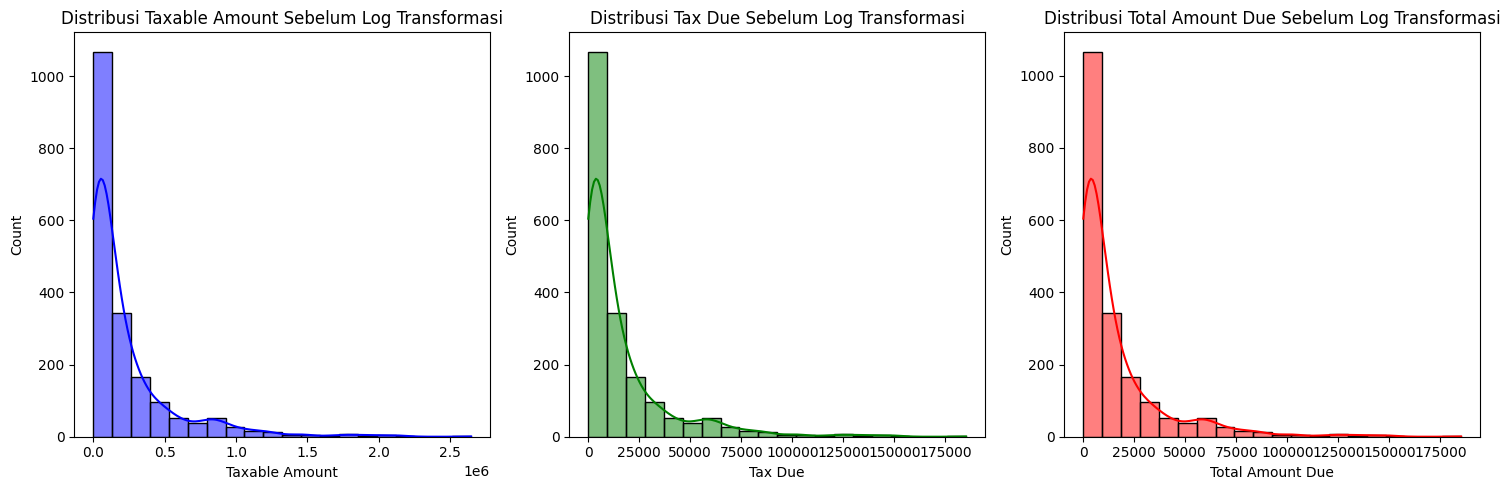

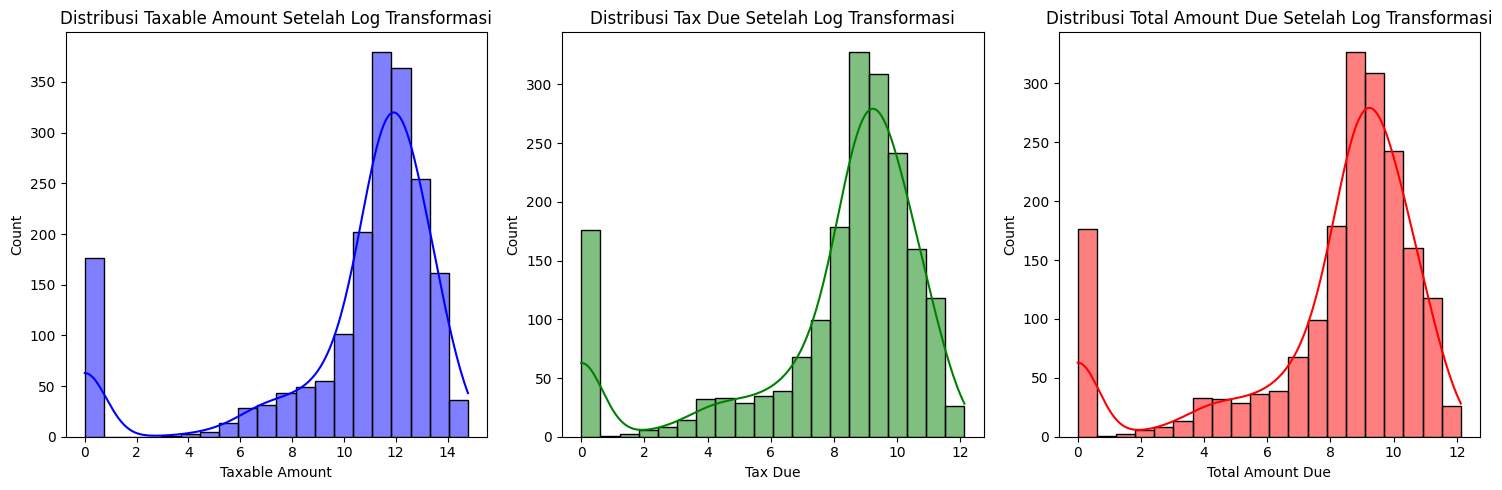

In [22]:
# 1. Visualisasi Sebelum Log Transformasi
plt.figure(figsize=(15, 5))

# Taxable Amount
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Taxable Amount'], kde=True, bins=20, color='blue')
plt.title("Distribusi Taxable Amount Sebelum Log Transformasi")

# Tax Due
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Tax Due'], kde=True, bins=20, color='green')
plt.title("Distribusi Tax Due Sebelum Log Transformasi")

# Total Amount Due
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Total Amount Due'], kde=True, bins=20, color='red')
plt.title("Distribusi Total Amount Due Sebelum Log Transformasi")

plt.tight_layout()
plt.show()

# 2. Transformasi Data (Log Transformasi)
# Karena log(0) tidak terdefinisi, kita gunakan log1p yang setara dengan log(x+1)
df_cleaned['Taxable Amount'] = np.log1p(df_cleaned['Taxable Amount'])
df_cleaned['Tax Due'] = np.log1p(df_cleaned['Tax Due'])
df_cleaned['Total Amount Due'] = np.log1p(df_cleaned['Total Amount Due'])

# 3. Visualisasi Sesudah Log Transformasi
plt.figure(figsize=(15, 5))

# Taxable Amount
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Taxable Amount'], kde=True, bins=20, color='blue')
plt.title("Distribusi Taxable Amount Setelah Log Transformasi")

# Tax Due
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['Tax Due'], kde=True, bins=20, color='green')
plt.title("Distribusi Tax Due Setelah Log Transformasi")

# Total Amount Due
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Total Amount Due'], kde=True, bins=20, color='red')
plt.title("Distribusi Total Amount Due Setelah Log Transformasi")

plt.tight_layout()
plt.show()
